In [114]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

In [201]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    blurred = cv2.GaussianBlur(image, (3, 3), 0)
    edged = cv2.Canny(blurred,25, 45, apertureSize= 3)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    dilate = cv2.dilate(edged, kernel, iterations=0)
    return (dilate,image)

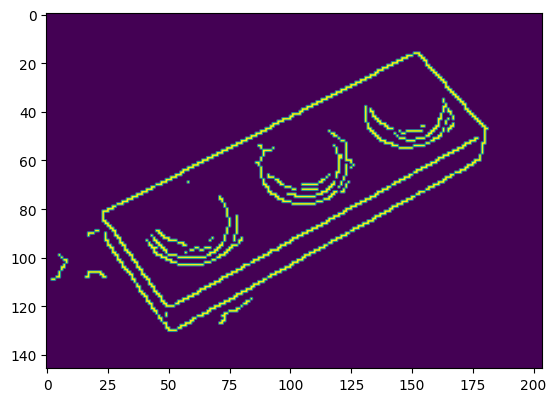

In [202]:
test,test2=get_image('test.jpg')
plt.imshow(test)

In [117]:
directory = "Images/Cropped Images"
directory2 = 'Images/Train/'
o=[]
x=[]
y=[]
for root, dirs, files in os.walk(directory):
  for dir in dirs:
    fetch_file=os.path.join(root, dir)
    save_file=os.path.join(directory2,dir)
    for file in os.listdir(fetch_file):
      if not file.startswith('.'):
        temp1,temp2=get_image(os.path.join(fetch_file,file))
        x.append(temp1)
        o.append(temp2)
        y.append(dir)
        save=os.path.join(save_file+'/',file)
        #print(save)
        if cv2.imwrite(save,temp1):
          cv2.imwrite(save,temp1)
          continue
        else :
          os.makedirs(save_file)

In [118]:
X=[]
for i in x:
    X.append(cv2.resize(i,(500,500)))

Brick_1x1


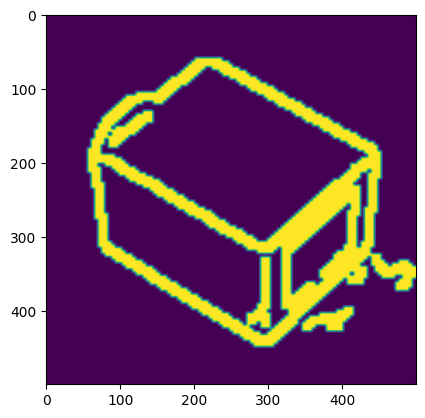

In [119]:
print(y[0])
plt.imshow(X[12])

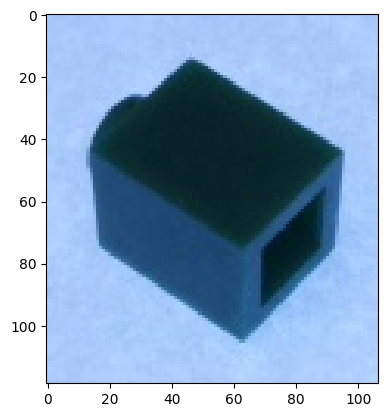

In [120]:
plt.imshow(o[12])

In [121]:
#plt.imshow()

In [122]:
print(type(X))
X=np.array(X)
X.shape

<class 'list'>


(4581, 500, 500)

In [123]:
# Reshape the array into shape (n_samples, n_features)
n_samples = X.shape[0]
n_features = X.shape[1] * X.shape[2]
X = np.reshape(X, (n_samples, n_features))

print(X.shape)

(4581, 250000)


In [124]:
from sklearn.preprocessing import MultiLabelBinarizer

#label = ['Brick_1x1','Brick_1x2','Brick_1x3','Brick_1x4','Brick_2x2','Plate_2x4','Brick_2x2_L','Brick_2x2_Slope','Brick_2x3','Brick_2x4','Plate_1x1','Plate_1x1_Round','Plate_1x1_Slope','Plate_1x2','Plate_1x2_Grill','Plate_1x3','Plate_1x4','Plate_2x2','Plate_2x2_L','Plate_2x3']

# Convert the list of labels to a binary array
mlb = MultiLabelBinarizer()
y_binary = mlb.fit_transform(y)
y_string = mlb.inverse_transform(y_binary)

# Check the shape of the binary array
print(y_binary.shape)

(4581, 25)


In [125]:
label = {'Brick_1x1':0,'Brick_1x2':1,'Brick_1x3':2,'Brick_1x4':3,
         'Brick_2x2':4,'Plate_2x4':5,'Brick_2x2_L':6,'Brick_2x2_Slope':7,
         'Brick_2x3':8,'Brick_2x4':9,'Plate_1x1':10,'Plate_1x1_Round':11,
         'Plate_1x1_Slope':12,'Plate_1x2':13,'Plate_1x2_Grill':14,'Plate_1x3':15,
         'Plate_1x4':16,'Plate_2x2':17,'Plate_2x2_L':18,'Plate_2x3':19}
def match_labels_to_keys(y, label):
    # Initialize an empty list to store the matching keys
    keys = []
    # Loop through each element in y
    for element in y:
        # Check if the element is in the values of the dictionary
        if element in label.keys():
            # If the element is in the values, find the corresponding key
            for key, value in label.items():
                if key == element:
                    keys.append(value)

    return keys
key=match_labels_to_keys(y,label)

In [ ]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Define a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Define a MultiOutputClassifier with the Random Forest classifier
multi_clf = MultiOutputClassifier(clf)

# Fit the MultiOutputClassifier to the training data
multi_clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = multi_clf.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

In [127]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, key, test_size=0.2, random_state=42,stratify=key)

# Define a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the MultiOutputClassifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        43
           1       0.63      0.81      0.71        48
           2       0.82      0.87      0.85        38
           3       0.68      0.85      0.76        48
           4       0.63      0.85      0.73        47
           5       0.91      0.70      0.79        43
           6       0.60      0.80      0.68        64
           7       0.61      0.37      0.46        38
           8       0.89      0.60      0.72        40
           9       0.78      0.82      0.80        49
          10       0.77      0.74      0.75        58
          11       1.00      0.93      0.96        42
          12       0.73      0.73      0.73        66
          13       0.83      0.61      0.70        41
          14       0.72      0.88      0.79        43
          15       0.82      0.78      0.79        40
          16       0.86      0.80      0.83        45
          17       0.86    

In [315]:
def get_test(image_path):
    image = cv2.imread(image_path,0)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    blurred = cv2.GaussianBlur(image, (3, 3), 0)
    edged = cv2.Canny(blurred,25, 45, apertureSize= 3)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    dilate = cv2.dilate(edged, kernel, iterations=1)
    return (dilate)

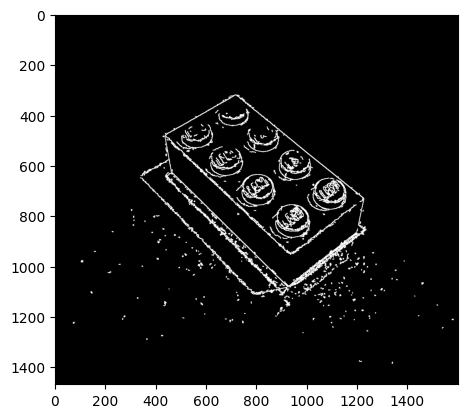

In [320]:
test_d=get_test('test4.jpg')
plt.imshow(test_d,cmap='gray')

In [321]:
test=cv2.resize(test_d,(500,500))
test=np.reshape(test,(1,500*500))
print(test)


[[0 0 0 ... 0 0 0]]


In [322]:
prediction=clf.predict(test)

In [323]:
prediction

array([9])